In [31]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [33]:
import pathlib
from PIL import Image

import cv2
sns.set_style('darkgrid')
import plotly.express as px

In [34]:
train_brain_dataset = "dataset/Training"

data = []

In [35]:
for tumortype in os.listdir(train_brain_dataset):
    tumortype_path = os.path.join(train_brain_dataset, tumortype)
    

    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
        
        label = tumortype
        
        data.append((img_path, label))

train = pd.DataFrame(data, columns=['image_path', 'label'])

In [36]:
train

,image_path,label
0,dataset/Training\glioma\Tr-glTr_0000.jpg,glioma
1,dataset/Training\glioma\Tr-glTr_0001.jpg,glioma
2,dataset/Training\glioma\Tr-glTr_0002.jpg,glioma
3,dataset/Training\glioma\Tr-glTr_0003.jpg,glioma
4,dataset/Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,dataset/Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,dataset/Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,dataset/Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,dataset/Training\pituitary\Tr-pi_1455.jpg,pituitary


In [37]:
test_brain_dataset = "dataset/Testing"
data = []


for tumortype in os.listdir(test_brain_dataset):
    tumortype_path = os.path.join(test_brain_dataset, tumortype)
    
    
    for filename in os.listdir(tumortype_path):
        img_path = os.path.join(tumortype_path, filename)
    
        
        label = tumortype
        
    
        data.append((img_path, label))


test = pd.DataFrame(data, columns=['image_path', 'label'])
test

,image_path,label
0,dataset/Testing\glioma\Te-glTr_0000.jpg,glioma
1,dataset/Testing\glioma\Te-glTr_0001.jpg,glioma
2,dataset/Testing\glioma\Te-glTr_0002.jpg,glioma
3,dataset/Testing\glioma\Te-glTr_0003.jpg,glioma
4,dataset/Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,dataset/Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,dataset/Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,dataset/Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,dataset/Testing\pituitary\Te-pi_0298.jpg,pituitary


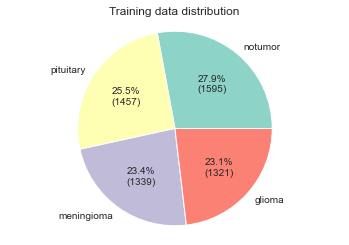

In [38]:
data_distribution = train.label.value_counts()

def custom_autopct(pct):
    total = sum(data_distribution)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


# pie chart for data balance
plt.pie(data_distribution, labels = data_distribution.index, autopct=custom_autopct)
plt.title("Training data distribution")
plt.axis("equal")
plt.show()

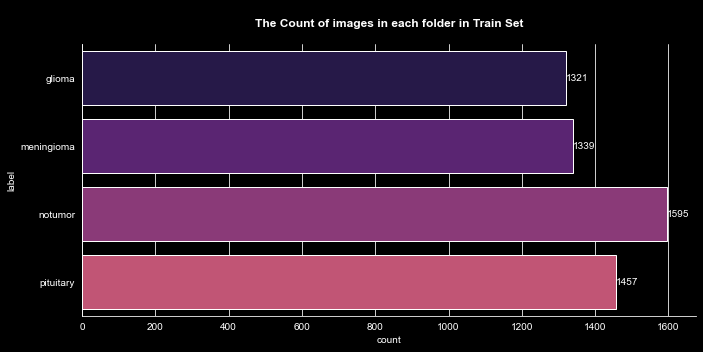

In [39]:

plt.style.use('dark_background')  # Setting dark background style
sns.set_palette('magma')
fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=train, y=train["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder in Train Set\n", weight="bold", color='white')  # Adjusting title color

plt.show()


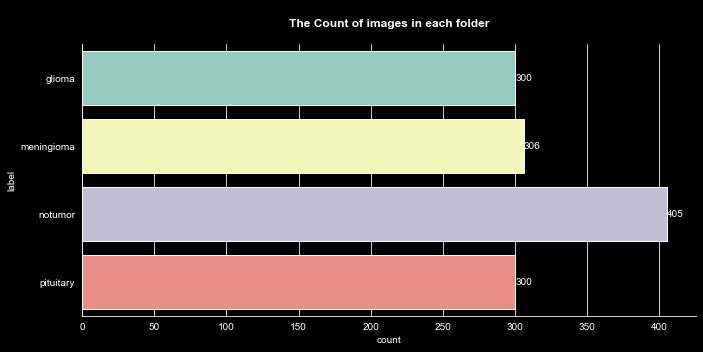

In [40]:
plt.style.use('dark_background')  # Setting dark background style

fig, ax = plt.subplots(figsize=(11, 5), facecolor='black')  # Setting black background

for i in ["top", "right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=test, y=test["label"])

for container in x.containers:
    x.bar_label(container)

plt.title("\nThe Count of images in each folder\n", weight="bold", color='white')  # Adjusting title color

plt.show()


### SPLITING DATA: TRAIN TEST AND VALIDATION

In [41]:
train_data, valid_data = train_test_split(train, test_size=0.2, random_state=42, shuffle = True , stratify=train['label'])

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test.shape}")
print(f"Validation set shape: {valid_data.shape}")

Training set shape: (4569, 2)
Testing set shape: (1311, 2)
Validation set shape: (1143, 2)


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization, Activation, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

## IMAGE GENERATION

In [44]:
batch_size = 32
image_size = (224, 224)
channels = 3

train_datagen = ImageDataGenerator()

valid_test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,
    class_mode='categorical',  
    color_mode = 'rgb'
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle = True, 
    batch_size=batch_size,class_mode='categorical',
    color_mode = 'rgb'
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    shuffle=False,  
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'rgb'
)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


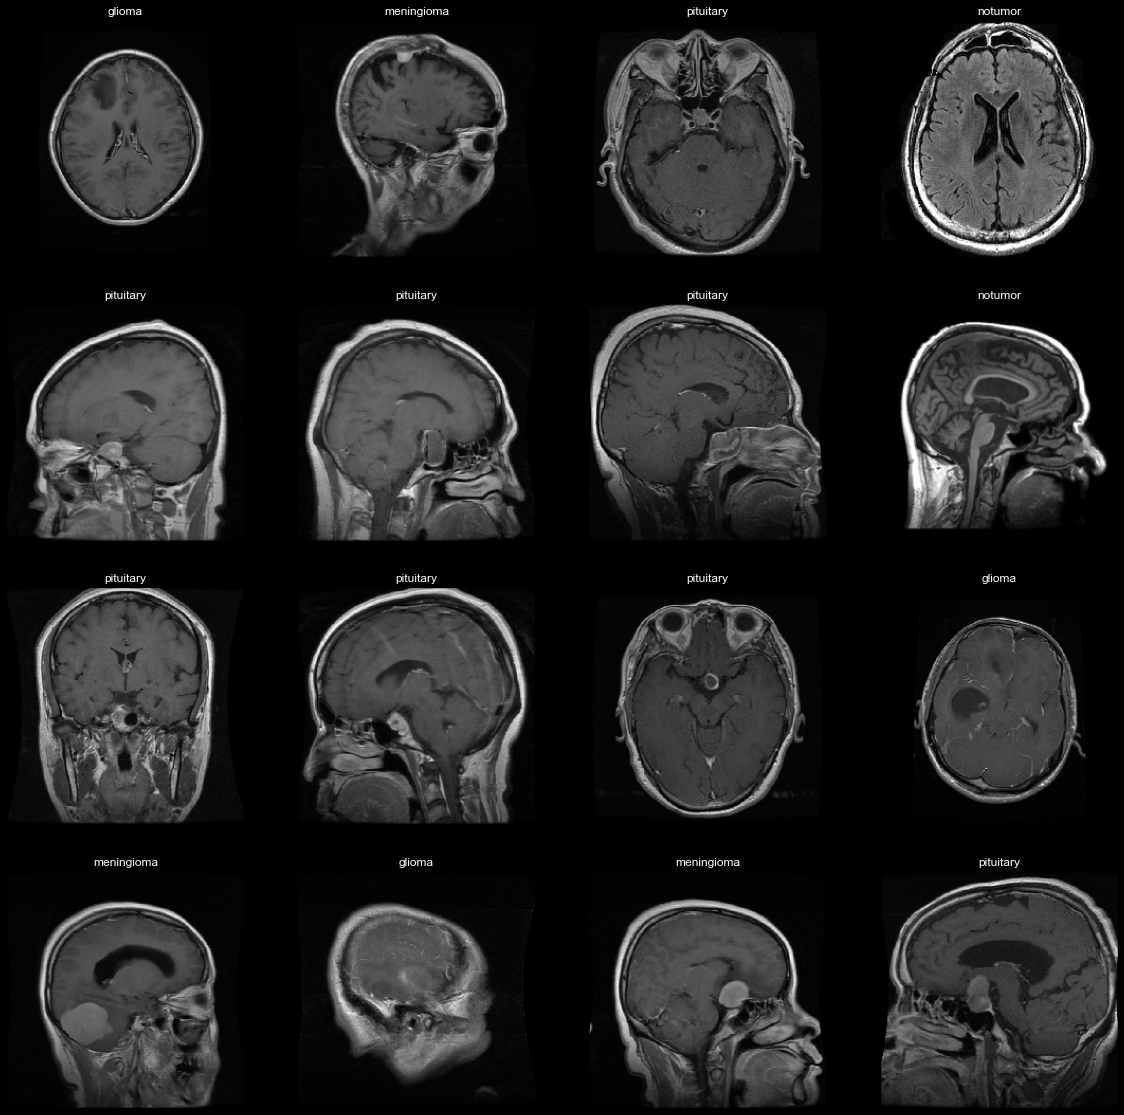

In [45]:
g_dict = train_generator.class_indices      
classes = list(g_dict.keys())       
images, labels = next(train_generator)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'white', fontsize= 12)
    plt.axis('off')
plt.show()



In [80]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
pip install --upgrade tensorflow


### MODEL 1 CNN

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 flatten_1 (Flatten)         (None, 401408)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               102760704 
                                                      

In [47]:
epochs = 20 
history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/20


143/143 [==============================] - 254s 2s/step - loss: 70.3476 - accuracy: 0.7279 - val_loss: 0.5932 - val_accuracy: 0.8504
Epoch 2/20
143/143 [==============================] - 442s 3s/step - loss: 0.4413 - accuracy: 0.8860 - val_loss: 0.4337 - val_accuracy: 0.8854
Epoch 3/20
143/143 [==============================] - 785s 6s/step - loss: 0.2317 - accuracy: 0.9317 - val_loss: 0.3441 - val_accuracy: 0.9073
Epoch 4/20
143/143 [==============================] - 770s 5s/step - loss: 0.1460 - accuracy: 0.9586 - val_loss: 0.3432 - val_accuracy: 0.9178
Epoch 5/20
143/143 [==============================] - 263s 2s/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.3822 - val_accuracy: 0.9265
Epoch 6/20
143/143 [==============================] - 262s 2s/step - loss: 0.0628 - accuracy: 0.9858 - val_loss: 0.3578 - val_accuracy: 0.9230
Epoch 7/20
143/143 [==============================] - 238s 2s/step - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.3714 - val_accuracy: 0.9

In [51]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

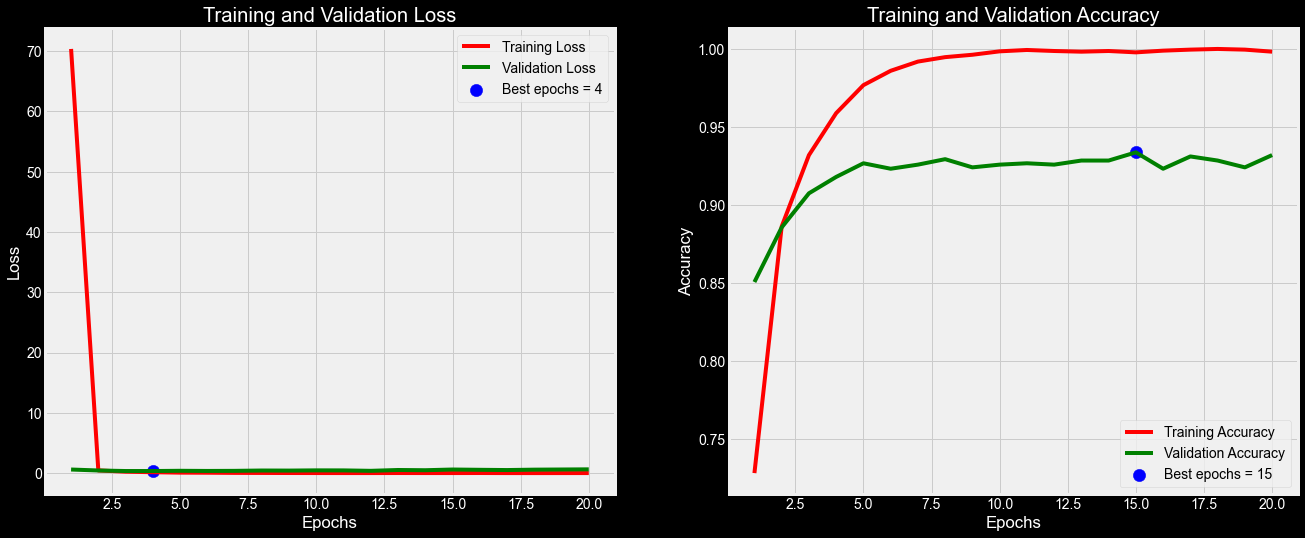

In [62]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [57]:
train_score = model.evaluate(train_generator)
print(f"Training Loss: {train_score[0]}")
print(f"Training Accuracy: {train_score[1]}")

valid_score = model.evaluate(valid_generator)
print(f"Validation Loss: {valid_score[0]}")
print(f" Validation Accuracy: {valid_score[1]}")
test_score = model.evaluate(test_generator)
print(f"Test Loss: {test_score[0]}")
print(f"Test Accuracy: {test_score[1]}")

143/143 [==============================] - 55s 386ms/step - loss: 1.1953e-04 - accuracy: 1.0000
Training Loss: 0.00011952787463087589
Training Accuracy: 1.0
36/36 [==============================] - 15s 414ms/step - loss: 0.6227 - accuracy: 0.9318
Validation Loss: 0.6227339506149292
 Validation Accuracy: 0.9317585229873657
41/41 [==============================] - 17s 400ms/step - loss: 0.5739 - accuracy: 0.9268
Test Loss: 0.5738648772239685
Test Accuracy: 0.9267734289169312


In [63]:
preds = model.predict_generator(test_generator)

y_pred = np.argmax(preds , axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_13104\3780023274.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


### CONFUSION MATRIX

C:\Users\hp\AppData\Local\Temp\ipykernel_13104\329433308.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


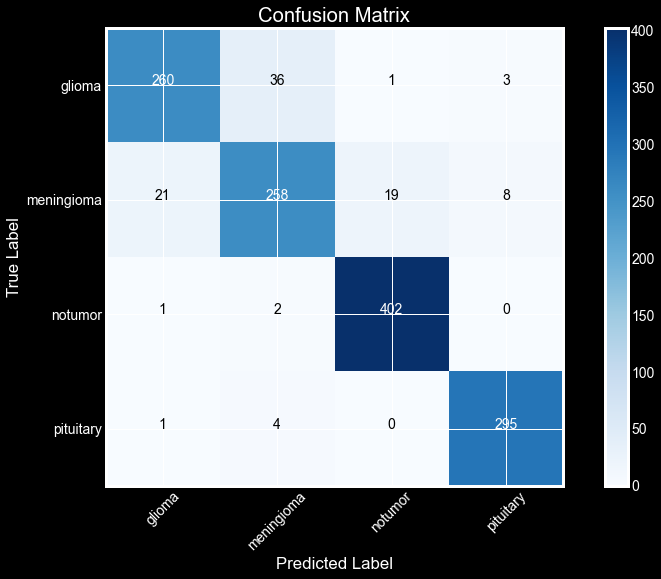

In [86]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')
plt.figure(figsize= (12, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [65]:
print(classification_report(test_generator.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.92      0.87      0.89       300
  meningioma       0.86      0.84      0.85       306
     notumor       0.95      0.99      0.97       405
   pituitary       0.96      0.98      0.97       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311



### TESTING

In [72]:
image_size = 224  # Assuming you want images to be resized to 224x224 pixels
true_test_ds = tf.keras.preprocessing.image_dataset_from_directory (
    test_brain_dataset,
    shuffle = True,
    image_size= (image_size, image_size),
    batch_size = batch_size
)

Found 1311 files belonging to 4 classes.


In [73]:
test_classes = true_test_ds.class_names
test_classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 69ms/step


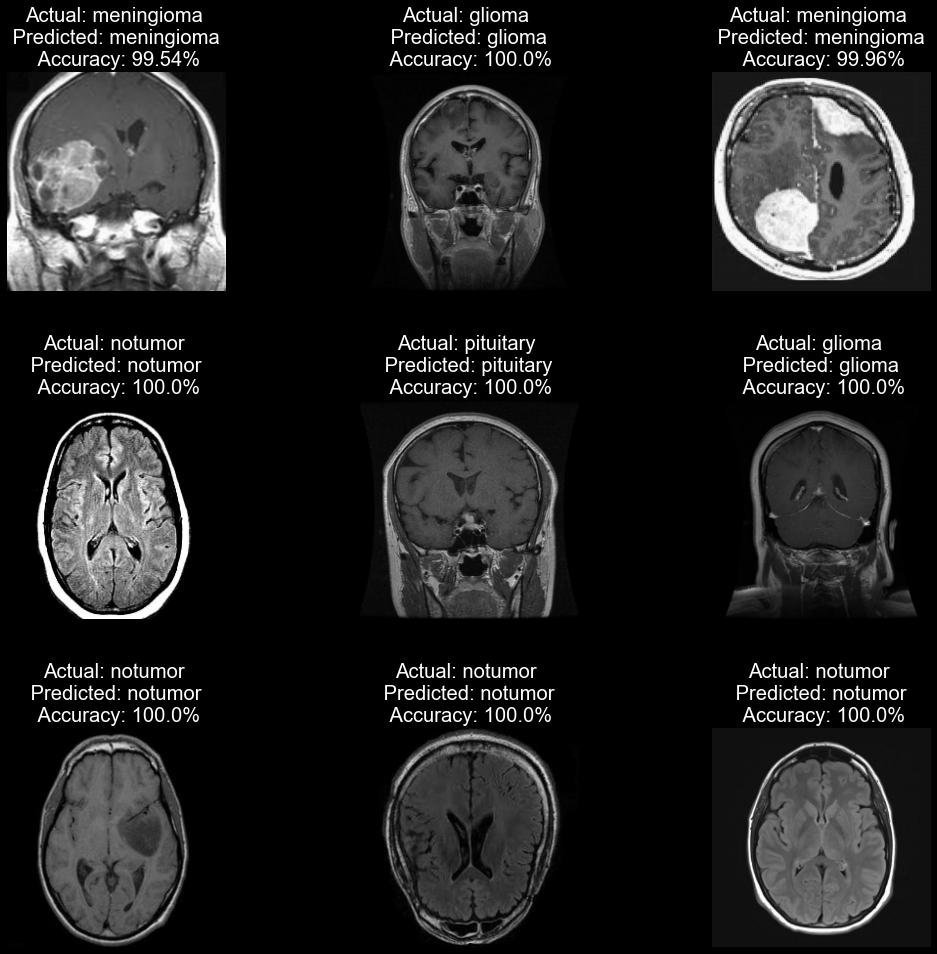

In [88]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### MODEL 2 EfficientNetB3

In [89]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_generator.class_indices.keys())) # define number of classes in dense layer

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 49s 1us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 256)               393472    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                      

In [90]:
epochs = 10   

history = model.fit(x= train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
143/143 [==============================] - 1512s 10s/step - loss: 6.5633 - accuracy: 0.8634 - val_loss: 4.9947 - val_accuracy: 0.9195
Epoch 2/10
143/143 [==============================] - 720s 5s/step - loss: 4.0313 - accuracy: 0.9551 - val_loss: 3.3137 - val_accuracy: 0.9405
Epoch 3/10
143/143 [==============================] - 526s 4s/step - loss: 2.6586 - accuracy: 0.9772 - val_loss: 2.1619 - val_accuracy: 0.9668
Epoch 4/10
143/143 [==============================] - 525s 4s/step - loss: 1.7551 - accuracy: 0.9856 - val_loss: 1.4428 - val_accuracy: 0.9668
Epoch 5/10
143/143 [==============================] - 523s 4s/step - loss: 1.1662 - accuracy: 0.9899 - val_loss: 0.9693 - val_accuracy: 0.9746
Epoch 6/10
143/143 [==============================] - 521s 4s/step - loss: 0.7742 - accuracy: 0.9937 - val_loss: 0.6482 - val_accuracy: 0.9773
Epoch 7/10
143/143 [==============================] - 531s 4s/step - loss: 0.5267 - accuracy: 0.9937 - val_loss: 0.4505 - val_accuracy: 0.98

In [91]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

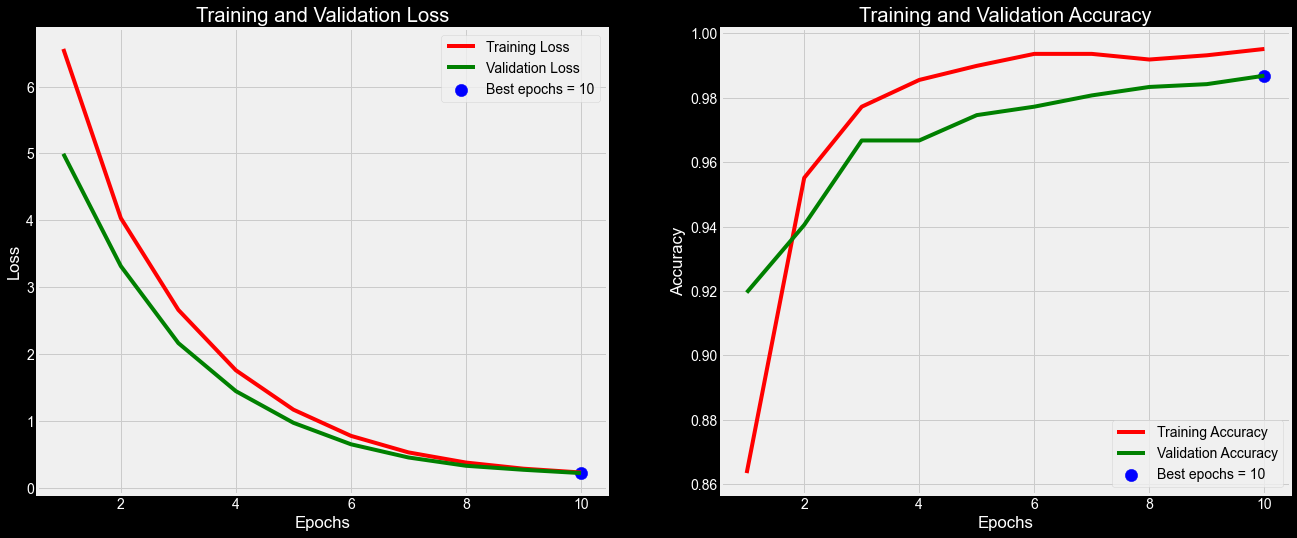

In [92]:
plt.style.use('dark_background')
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')


plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')

plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
for text in plt.gca().get_legend().get_texts():
    text.set_color('black')

plt.tight_layout
plt.show();

In [94]:
ts_length = len(test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_generator, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_generator, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_generator, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

19/19 [==============================] - 15s 807ms/step - loss: 0.2555 - accuracy: 0.9720
Train Loss:  0.17382602393627167
Train Accuracy:  1.0
--------------------
Validation Loss:  0.209243044257164
Validation Accuracy:  0.9884868264198303
--------------------
Test Loss:  0.2555175721645355
Test Accuracy:  0.9720394611358643


In [95]:
preds = model.predict_generator(test_generator)
y_pred = np.argmax(preds, axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_13104\3633613801.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


C:\Users\hp\AppData\Local\Temp\ipykernel_13104\1908113636.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


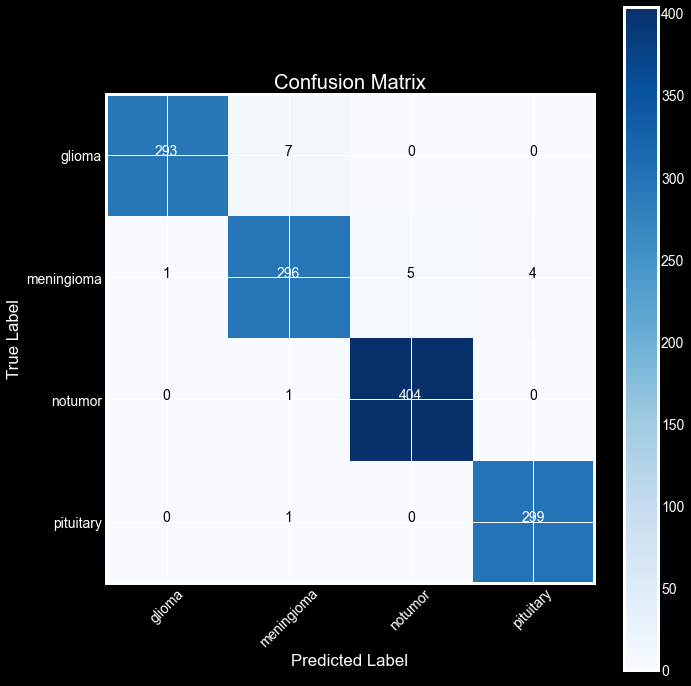

In [97]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.style.use('dark_background')

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [99]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       1.00      0.98      0.99       300
  meningioma       0.97      0.97      0.97       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.99      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.98      0.98      1311
weighted avg       0.99      0.99      0.99      1311



1/1 [==============================] - 0s 79ms/step


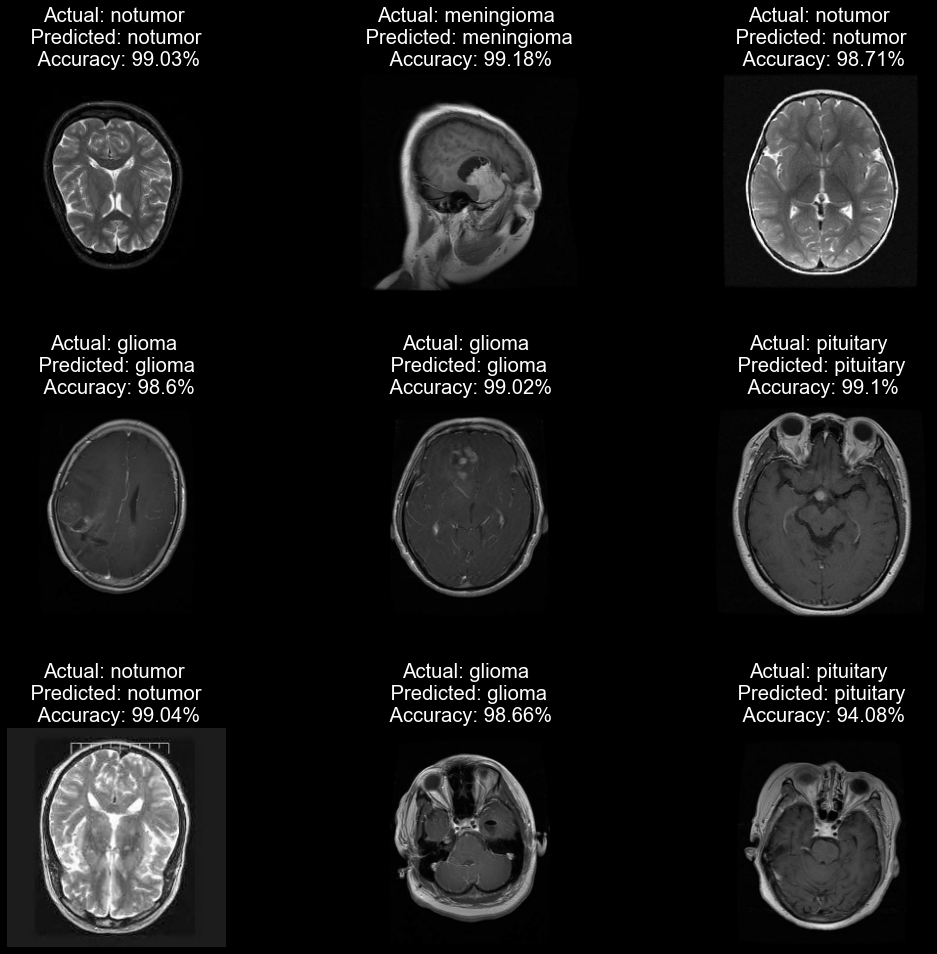

In [100]:
plt.figure(figsize = (15,15))
plt.style.use('dark_background')
for images, labels in true_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Accuracy: {confidence}%")
        plt.axis("off")
        
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [102]:
scores = model.evaluate(test_generator)

41/41 [==============================] - 31s 744ms/step - loss: 0.2123 - accuracy: 0.9855


In [105]:
for images, labels in true_test_ds.take(1):
    for i in range(32):
        
    
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = test_classes[labels[i]]
        
        print(f"Actual: {actual_class}, Predicted: {predicted_class}, Accuracy: {confidence}% \n")
    

1/1 [==============================] - 0s 76ms/step
Actual: pituitary, Predicted: pituitary, Accuracy: 98.89% 

1/1 [==============================] - 0s 81ms/step
Actual: glioma, Predicted: glioma, Accuracy: 98.13% 

1/1 [==============================] - 0s 78ms/step
Actual: notumor, Predicted: notumor, Accuracy: 98.73% 

1/1 [==============================] - 0s 83ms/step
Actual: notumor, Predicted: notumor, Accuracy: 98.94% 

1/1 [==============================] - 0s 87ms/step
Actual: notumor, Predicted: notumor, Accuracy: 95.27% 

1/1 [==============================] - 0s 80ms/step
Actual: meningioma, Predicted: meningioma, Accuracy: 98.18% 

1/1 [==============================] - 0s 78ms/step
Actual: meningioma, Predicted: meningioma, Accuracy: 99.44% 

1/1 [==============================] - 0s 89ms/step
Actual: notumor, Predicted: notumor, Accuracy: 99.02% 

1/1 [==============================] - 0s 83ms/step
Actual: glioma, Predicted: meningioma, Accuracy: 84.03% 

1/1 [=======